In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. The raw image is available in spicy.misc package with the name face.

In [49]:
import numpy as np
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
import scipy.misc as misc   # Guide packagempopr

import scipy
import matplotlib.pyplot as plt

%matplotlib inline

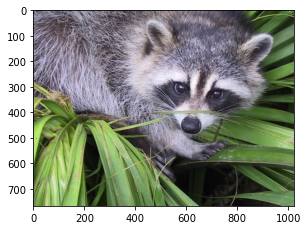

In [50]:
# Diplaying a sample racoon image before compression.
face = misc.face() 
plt.figure(figsize=(10, 3.6))
plt.imshow(face)
plt.show()

In [51]:
"""Adding Noise - Noise is caused by irregular points caused by large 
#changes in the value of the original picture area.so as long as the original picture data 
is modified irregularly, noise can be generated"""
face.shape

(768, 1024, 3)

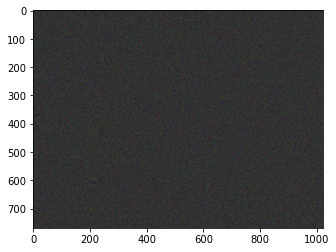

In [52]:
# Check noise
noise = np.random.randint(0,100,size=face.shape)
plt.imshow(noise, cmap='gray')

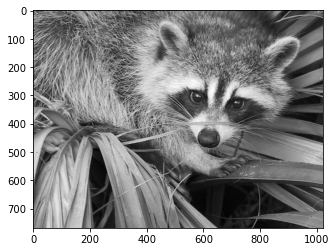

In [53]:
#Add noise to the picture
noise_face = face + noise #Add the randomly generated data to the original image to add noise to the original image.
noise_face = scipy.misc.face(gray=True)
plt.imshow(noise_face,cmap='gray')

In [54]:
# Compressing the gray scale image into 5 clusters
rows = noise_face.shape[0]
cols = noise_face.shape[1]
rows,cols

(768, 1024)

In [55]:
# Reshaping the compress gray scale into 5 clusters.
#image = noise_face.reshape(noise_face.shape[0]*noise_face.shape[1],3)
image = noise_face.reshape(rows*cols,1)

kmeans = KMeans(n_clusters = 5, n_init=10, max_iter=200)
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
#Clustering image 
clusters = np.asarray(kmeans.cluster_centers_,dtype=np.uint8) 
labels = np.asarray(kmeans.labels_,dtype=np.uint8 )  
labels = labels.reshape(rows,cols); 
labels

array([[0, 0, 4, ..., 0, 0, 4],
       [3, 0, 0, ..., 0, 4, 4],
       [3, 3, 0, ..., 0, 4, 4],
       ...,
       [0, 0, 0, ..., 4, 4, 4],
       [3, 0, 0, ..., 4, 4, 4],
       [3, 0, 0, ..., 4, 4, 4]], dtype=uint8)

In [57]:
np.save('codebook_racoon.npy',clusters) 

In [58]:
#Saving image into cluster
plt.imsave('raccon.png',labels);

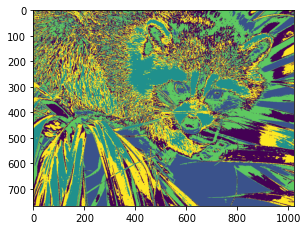

In [59]:
# Visualizing the compressed image
noise_face = plt.imread('raccon.png')
plt.figure(figsize=(10, 3.6))
plt.imshow(noise_face)

plt.show()

In [ ]:
♻♻